In [2]:
# -------------------------------
# Course: DSC530
# Instructor: Matthew Metzger
# Week: 12
# Exercise: 12.2
# Name: Quina, Eric
# Start Date: 2025-01-12
# End Date: 
# -------------------------------

# See Pick up section after the initial file is built

#import needed libraries
import pandas as pd
import kagglehub

# set pd percision so I do not have to do it every time
pd.set_option("display.precision", 2)

# download latest version of the data set from Martin Ellis on Kagglehub
path = kagglehub.dataset_download("martinellis/nhl-game-data")

# display where the data downloaded to
# manually copied data into folder ./NHL/
print("Path to dataset files:", path)

Path to dataset files: C:\Users\ericq\.cache\kagglehub\datasets\martinellis\nhl-game-data\versions\2


In [3]:
# change this to path if it is stored in a different place
PATH = './NHL/'

# read in data
player_info = pd.read_csv(f'{PATH}player_info.csv', low_memory = False,
                          parse_dates = ["birthDate"])
game_skater_stats = pd.read_csv(f'{PATH}game_skater_stats.csv',
                                low_memory = False)
game = pd.read_csv(f'{PATH}game.csv', low_memory = False,
                   parse_dates = ["date_time_GMT"])

In [4]:
# define functions for repeated activities

# viewdata as limited to 5 rows, but all columns
def viewdata(df):
    with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
        display(df)


In [5]:
viewdata(player_info)

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,birthStateProvince,height,height_cm,weight,shootsCatches
0,8466148,Marian,Hossa,SVK,Stará Lubovna,RW,1979-01-12 00:00:00,NaN,"6' 1""",185.42,207.0,L
1,8465058,Michal,Rozsival,CZE,Vlasim,D,1978-09-03 01:00:00,NaN,"6' 1""",185.42,210.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...
3923,8477574,Parker,Milner,USA,Pittsburgh,G,1990-09-06 01:00:00,PA,"6' 1""",185.42,185.0,L
3924,8477352,Ryan,Fitzgerald,USA,Boca Raton,C,1994-10-19 01:00:00,FL,"5' 9""",175.26,172.0,R


In [6]:
# drop birth city and birth state/province as that is not relevant to my review
player_info = player_info.drop(columns=['birthCity', 'birthStateProvince'])

In [7]:
# check results of player info change
viewdata(player_info)

,player_id,firstName,lastName,nationality,primaryPosition,birthDate,height,height_cm,weight,shootsCatches
0,8466148,Marian,Hossa,SVK,RW,1979-01-12 00:00:00,"6' 1""",185.42,207.0,L
1,8465058,Michal,Rozsival,CZE,D,1978-09-03 01:00:00,"6' 1""",185.42,210.0,R
...,...,...,...,...,...,...,...,...,...,...
3923,8477574,Parker,Milner,USA,G,1990-09-06 01:00:00,"6' 1""",185.42,185.0,L
3924,8477352,Ryan,Fitzgerald,USA,C,1994-10-19 01:00:00,"5' 9""",175.26,172.0,R


In [8]:
# check nulls of target variable
player_info[player_info['shootsCatches'].isnull()]

,player_id,firstName,lastName,nationality,primaryPosition,birthDate,height,height_cm,weight,shootsCatches
1090,8478999,Niklas,Treutle,DEU,G,1991-04-29 01:00:00,"6' 2""",187.96,185.0,NaN
1300,8479138,Scott,Foster,NaN,G,1982-01-17 00:00:00,NaN,NaN,NaN,NaN
1342,8480718,Ben,Wexler,NaN,G,1994-12-23 00:00:00,NaN,NaN,NaN,NaN
1559,8460704,Johan,Hedberg,SWE,G,1973-05-05 01:00:00,"6' 0""",182.88,190.0,NaN
1780,8477199,Zach,Sikich,USA,G,1980-10-21 01:00:00,"6' 1""",185.42,200.0,NaN
2342,8468550,Mikael,Tellqvist,SWE,G,1979-09-19 01:00:00,"6' 0""",182.88,189.0,NaN
2386,8473632,Josh,Tordjman,CAN,G,1985-01-11 00:00:00,"6' 1""",185.42,156.0,NaN
3055,8467418,Tommy,Vestlund,SWE,LW,1974-12-29 00:00:00,"6' 0""",182.88,202.0,NaN
3173,8464982,Pavel,Skrbek,CZE,D,1978-08-09 01:00:00,"6' 3""",190.50,191.0,NaN
3217,8467541,Petr,Hubacek,CZE,C,1979-09-02 01:00:00,"6' 2""",187.96,185.0,NaN


In [9]:
# look up missing data on elite prospects and fill
# https://www.eliteprospects.com/player/22399/niklas-treutle
player_info.at[1090, 'shootsCatches'] = 'L'
# https://www.eliteprospects.com/player/80922/scott-foster
player_info.at[1300, 'shootsCatches'] = 'L'
player_info.at[1300, 'height_cm'] = 183
player_info.at[1300, 'weight'] = 185.0
# https://www.eliteprospects.com/player/361075/benjamin-wexler
player_info.at[1342, 'shootsCatches'] = 'L'
player_info.at[1342, 'height_cm'] = 178
player_info.at[1342, 'weight'] = 190.0
# https://www.eliteprospects.com/player/480/johan-hedberg
player_info.at[1559, 'shootsCatches'] = 'L'
# https://www.eliteprospects.com/player/79474/zachary-sikich
player_info.at[1780, 'shootsCatches'] = 'L'
# https://www.eliteprospects.com/player/742/mikael-tellqvist
player_info.at[2342, 'shootsCatches'] = 'L'
# https://www.eliteprospects.com/player/11362/josh-tordjman
player_info.at[2386, 'shootsCatches'] = 'L'
# https://www.eliteprospects.com/player/746/tommy-westlund
# discovered last name wrong - dob match
player_info.at[3055, 'shootsCatches'] = 'R'
player_info.at[3055, 'lastName'] = 'Westlund'
# https://www.eliteprospects.com/player/506/pavel-skrbek
player_info.at[3173, 'shootsCatches'] = 'L'
# https://www.eliteprospects.com/player/10871/petr-hubacek
player_info.at[3217, 'shootsCatches'] = 'R'
# https://www.eliteprospects.com/player/11762/dan-smith
player_info.at[3237, 'shootsCatches'] = 'L'
# https://www.eliteprospects.com/player/18317/pavel-kolarik
player_info.at[3319, 'shootsCatches'] = 'L'
# https://www.eliteprospects.com/player/12844/bryan-adams
player_info.at[3324, 'shootsCatches'] = 'L'
# https://www.eliteprospects.com/player/12732/marek-posmyk
player_info.at[3461, 'shootsCatches'] = 'R'
# https://www.eliteprospects.com/player/400710/david-ayres
player_info.at[3829, 'shootsCatches'] = 'L'
# https://www.eliteprospects.com/player/269479/kaden-fulcher
player_info.at[3914, 'shootsCatches'] = 'L'
# https://www.eliteprospects.com/player/91146/niclas-westerholm
player_info.at[3915, 'shootsCatches'] = 'L'

In [10]:
# check to ensure nulls are corrected
player_info[player_info['shootsCatches'].isnull()]

,player_id,firstName,lastName,nationality,primaryPosition,birthDate,height,height_cm,weight,shootsCatches


In [11]:
# check nulls of target variable
player_info[player_info['nationality'].isnull()]

,player_id,firstName,lastName,nationality,primaryPosition,birthDate,height,height_cm,weight,shootsCatches
1300,8479138,Scott,Foster,NaN,G,1982-01-17 00:00:00,NaN,183.00,185.0,L
1342,8480718,Ben,Wexler,NaN,G,1994-12-23 00:00:00,NaN,178.00,190.0,L
3512,8480373,Josef,Korenar,NaN,G,1998-01-31 00:00:00,"6' 1""",185.42,185.0,L
3541,8480356,Kyle,Keyser,NaN,G,1999-03-08 00:00:00,NaN,NaN,NaN,L
3803,8478975,Mason,Marchment,NaN,LW,1995-06-18 01:00:00,"6' 4""",193.04,220.0,L
3891,8479439,Jacob,MacDonald,NaN,D,1993-02-26 00:00:00,"6' 0""",182.88,204.0,L
3914,8480363,Kaden,Fulcher,NaN,G,1998-09-23 01:00:00,"6' 2""",187.96,182.0,L
3915,8480779,Niclas,Westerholm,NaN,G,1997-08-13 01:00:00,"6' 3""",190.50,198.0,L


In [12]:
# look up missing data on elite prospects and fill
# https://www.eliteprospects.com/player/80922/scott-foster
player_info.at[1300, 'nationality'] = 'CAN'
# https://www.eliteprospects.com/player/361075/benjamin-wexler
player_info.at[1342, 'nationality'] = 'USA'
# https://www.eliteprospects.com/player/225184/josef-ko%C5%99ena%C5%99
player_info.at[3512, 'nationality'] = 'CZE'
# https://www.eliteprospects.com/player/273156/kyle-keyser
player_info.at[3541, 'nationality'] = 'USA'
player_info.at[3541, 'height_cm'] = 188
player_info.at[3541, 'weight'] = 183.0
# https://www.eliteprospects.com/player/208693/mason-marchment
player_info.at[3803, 'nationality'] = 'CAN'
# https://www.eliteprospects.com/player/60064/jacob-macdonald
player_info.at[3891, 'nationality'] = 'USA'
# https://www.eliteprospects.com/player/269479/kaden-fulcher
player_info.at[3914, 'nationality'] = 'CAN'
# https://www.eliteprospects.com/player/91146/niclas-westerholm
player_info.at[3915, 'nationality'] = 'FIN'

In [13]:
# check to ensure nulls are corrected
player_info[player_info['nationality'].isnull()]

,player_id,firstName,lastName,nationality,primaryPosition,birthDate,height,height_cm,weight,shootsCatches


In [14]:
# create skate_ df by merging game_stats, player_info, and team_info
skate_df = game_skater_stats.merge(player_info, on='player_id', how='left')

In [15]:
# check merge
viewdata(skate_df)

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,penaltyMinutes,faceOffWins,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,firstName,lastName,nationality,primaryPosition,birthDate,height,height_cm,weight,shootsCatches
0,2016020045,8468513,4,955,1,0,0,2.0,0,0,0,0,0,1.0,1.0,0,0,1.0,1,858,97,0,Nick,Schultz,CAN,D,1982-08-25 01:00:00,"6' 1""",185.42,203.0,L
1,2016020045,8476906,4,1396,1,0,4,2.0,0,0,2,0,0,1.0,2.0,0,0,2.0,0,1177,0,219,Shayne,Gostisbehere,USA,D,1993-04-20 01:00:00,"5' 11""",180.34,180.0,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945828,2018030417,8478443,6,1006,0,0,1,1.0,0,0,0,0,0,0.0,1.0,0,0,2.0,-1,1006,0,0,Brandon,Carlo,USA,D,1996-11-26 00:00:00,"6' 5""",195.58,208.0,R
945829,2018030417,8478046,6,909,0,0,2,0.0,0,0,0,0,0,1.0,1.0,0,0,0.0,0,909,0,0,Danton,Heinen,CAN,C,1995-07-05 01:00:00,"6' 1""",185.42,185.0,L


In [16]:
# drop player and team ids in joined table
skate_df = skate_df.drop(columns=['player_id'])
# check drop
viewdata(skate_df)

,game_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,penaltyMinutes,faceOffWins,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,firstName,lastName,nationality,primaryPosition,birthDate,height,height_cm,weight,shootsCatches
0,2016020045,4,955,1,0,0,2.0,0,0,0,0,0,1.0,1.0,0,0,1.0,1,858,97,0,Nick,Schultz,CAN,D,1982-08-25 01:00:00,"6' 1""",185.42,203.0,L
1,2016020045,4,1396,1,0,4,2.0,0,0,2,0,0,1.0,2.0,0,0,2.0,0,1177,0,219,Shayne,Gostisbehere,USA,D,1993-04-20 01:00:00,"5' 11""",180.34,180.0,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945828,2018030417,6,1006,0,0,1,1.0,0,0,0,0,0,0.0,1.0,0,0,2.0,-1,1006,0,0,Brandon,Carlo,USA,D,1996-11-26 00:00:00,"6' 5""",195.58,208.0,R
945829,2018030417,6,909,0,0,2,0.0,0,0,0,0,0,1.0,1.0,0,0,0.0,0,909,0,0,Danton,Heinen,CAN,C,1995-07-05 01:00:00,"6' 1""",185.42,185.0,L


In [17]:
# check df
skate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945830 entries, 0 to 945829
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   game_id               945830 non-null  int64         
 1   team_id               945830 non-null  int64         
 2   timeOnIce             945830 non-null  int64         
 3   assists               945830 non-null  int64         
 4   goals                 945830 non-null  int64         
 5   shots                 945830 non-null  int64         
 6   hits                  547723 non-null  float64       
 7   powerPlayGoals        945830 non-null  int64         
 8   powerPlayAssists      945830 non-null  int64         
 9   penaltyMinutes        945830 non-null  int64         
 10  faceOffWins           945830 non-null  int64         
 11  faceoffTaken          945830 non-null  int64         
 12  takeaways             547723 non-null  float64       
 13 

In [18]:
# create df skater_stats that counts games played and aggregates player_stats
s_stats = skate_df[['lastName', 'firstName', 'birthDate', 'nationality',
                    'primaryPosition', 'shootsCatches', 'height_cm', 
                    'weight', 'game_id', 'timeOnIce', 'shots', 'goals',
                    'assists', 'hits', 'blocked', 'takeaways','giveaways',
                    'penaltyMinutes', 'plusMinus', 'powerPlayTimeOnIce',
                    'powerPlayGoals', 'powerPlayAssists',
                    'shortHandedTimeOnIce','shortHandedGoals',
                    'shortHandedAssists']]\
    .groupby(['lastName', 'firstName', 'birthDate', 'nationality',
              'primaryPosition', 'shootsCatches'], as_index=False)\
    .agg({'height_cm':'mean', 'weight':'mean', 'game_id':'count',
          'timeOnIce':'sum','shots':'sum', 'goals':'sum', 'assists':'sum',
          'hits':'sum', 'blocked':'sum', 'takeaways':'sum', 'giveaways':'sum',
          'penaltyMinutes':'sum', 'plusMinus':'sum', 'powerPlayTimeOnIce':'sum',
          'powerPlayGoals':'sum', 'powerPlayAssists':'sum',
          'shortHandedTimeOnIce':'sum', 'shortHandedGoals':'sum',
          'shortHandedAssists':'sum'}) 

In [19]:
# clean up data and add variables
#convert timeOnIce which is in sec to mins
s_stats['timeonice_m'] = s_stats['timeOnIce'] / 60
#convert timeOnIce which is in sec to mins
s_stats['PPTimeOnIce_m'] = s_stats['powerPlayTimeOnIce'] / 60
#convert timeOnIce which is in sec to mins
s_stats['SHTimeOnIce_m'] = s_stats['shortHandedTimeOnIce'] / 60
# convert birthdate to year
s_stats['birthDate'] = s_stats['birthDate'].dt.year
# convert height to in to match imperial weight
s_stats['height_in'] = s_stats['height_cm'] / 2.54
# create points which is goals + assists
s_stats['points'] = s_stats['goals'] + s_stats['assists']
# create pointspergame as a function of points/games
# create the same ratio for goals, assists, takeaways, giveaways, hits,
# and blocks
s_stats['pointpergame'] = s_stats['points'] / s_stats['game_id']
s_stats['goalspergame'] = s_stats['goals'] / s_stats['game_id']
s_stats['assistspergame'] = s_stats['assists'] / s_stats['game_id']
s_stats['takeawayspergame'] = s_stats['takeaways'] / s_stats['game_id']
s_stats['giveawayspergame'] = s_stats['giveaways'] / s_stats['game_id']
s_stats['hitspergame'] = s_stats['hits'] / s_stats['game_id']
s_stats['blockedshotspergame'] = s_stats['blocked'] / s_stats['game_id']
s_stats['TOIpergame'] = s_stats['timeonice_m'] / s_stats['game_id']
# create shooting percentage as a function of goals/shots
s_stats['shootprct'] = s_stats['goals'] / s_stats['shots']
# rename comlumns to align with changes and clarify data content
s_stats = s_stats.rename(columns={'birthDate':'birthyear', 
                                  'weight':'weight_lbs',
                                  'game_id':'games_played', 
                                  'blocked':'blocked_shots'})
# drop columns no longer needed
s_stats = s_stats.drop(columns=['timeOnIce', 'height_cm'])

In [20]:
# create def_stats with filter to just defensemen that have played more than 82
# games (82 games in a single season). While the 82 games could fall in several
# seasons, this indicates that the player has spent a measurable amount of time
# playing in the NHL.
def_stats = s_stats[(s_stats['primaryPosition'] == 'D') &
                    (s_stats['games_played'] > 82)]
# create def_stats_R with filter to just right shot defensemen
def_stats_R = def_stats[def_stats['shootsCatches'] == 'R']
# create def_stats_L with filter to just left shot defensemen
def_stats_L = def_stats[def_stats['shootsCatches'] == 'L']

In [21]:
# check data before saving
viewdata(def_stats)
viewdata(def_stats_R)
viewdata(def_stats_L)

,lastName,firstName,birthyear,nationality,primaryPosition,shootsCatches,weight_lbs,games_played,shots,goals,assists,hits,blocked_shots,takeaways,giveaways,penaltyMinutes,plusMinus,powerPlayTimeOnIce,powerPlayGoals,powerPlayAssists,shortHandedTimeOnIce,shortHandedGoals,shortHandedAssists,timeonice_m,PPTimeOnIce_m,SHTimeOnIce_m,height_in,points,pointpergame,goalspergame,assistspergame,takeawayspergame,giveawayspergame,hitspergame,blockedshotspergame,TOIpergame,shootprct
22,Albelin,Tommy,1964,SWE,D,L,195.0,236,174,4,37,0.0,0.0,0.0,0.0,38,22,21945,1,13,18160,1,0,3882.17,365.75,302.67,74.0,41,0.17,0.02,0.16,0.00,0.00,0.00,0.00,16.45,0.02
24,Alberts,Andrew,1981,USA,D,L,218.0,472,259,8,47,288.0,138.0,26.0,49.0,500,-8,3199,0,1,65967,1,2,7441.85,53.32,1099.45,77.0,55,0.12,0.02,0.10,0.06,0.10,0.61,0.29,15.77,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3349,de Haan,Calvin,1991,CAN,D,L,198.0,567,770,18,110,1261.0,1164.0,268.0,437.0,186,49,10668,2,5,68634,1,0,11021.65,177.80,1143.90,73.0,128,0.23,0.03,0.19,0.47,0.77,2.22,2.05,19.44,0.02
3352,van Riemsdyk,Trevor,1991,USA,D,R,188.0,528,661,20,74,262.0,657.0,185.0,229.0,136,-7,7320,0,2,38040,0,1,8667.32,122.00,634.00,74.0,94,0.18,0.04,0.14,0.35,0.43,0.50,1.24,16.42,0.03


,lastName,firstName,birthyear,nationality,primaryPosition,shootsCatches,weight_lbs,games_played,shots,goals,assists,hits,blocked_shots,takeaways,giveaways,penaltyMinutes,plusMinus,powerPlayTimeOnIce,powerPlayGoals,powerPlayAssists,shortHandedTimeOnIce,shortHandedGoals,shortHandedAssists,timeonice_m,PPTimeOnIce_m,SHTimeOnIce_m,height_in,points,pointpergame,goalspergame,assistspergame,takeawayspergame,giveawayspergame,hitspergame,blockedshotspergame,TOIpergame,shootprct
48,Andersson,Rasmus,1996,SWE,D,R,214.0,338,542,22,76,246.0,385.0,105.0,207.0,178,22,24649,2,16,12324,0,4,6097.95,410.82,205.40,73.0,98,0.29,0.07,0.22,0.31,0.61,0.73,1.14,18.04,0.04
86,Aucoin,Adrian,1973,CAN,D,R,215.0,829,1555,75,222,294.0,175.0,60.0,50.0,580,48,163333,31,102,164074,0,4,19109.88,2722.22,2734.57,74.0,297,0.36,0.09,0.27,0.07,0.06,0.35,0.21,23.05,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3343,Zubov,Sergei,1970,RUS,D,R,198.0,530,1079,69,287,0.0,0.0,0.0,0.0,176,61,175449,46,157,99865,1,4,13863.80,2924.15,1664.42,73.0,356,0.67,0.13,0.54,0.00,0.00,0.00,0.00,26.16,0.06
3352,van Riemsdyk,Trevor,1991,USA,D,R,188.0,528,661,20,74,262.0,657.0,185.0,229.0,136,-7,7320,0,2,38040,0,1,8667.32,122.00,634.00,74.0,94,0.18,0.04,0.14,0.35,0.43,0.50,1.24,16.42,0.03


,lastName,firstName,birthyear,nationality,primaryPosition,shootsCatches,weight_lbs,games_played,shots,goals,assists,hits,blocked_shots,takeaways,giveaways,penaltyMinutes,plusMinus,powerPlayTimeOnIce,powerPlayGoals,powerPlayAssists,shortHandedTimeOnIce,shortHandedGoals,shortHandedAssists,timeonice_m,PPTimeOnIce_m,SHTimeOnIce_m,height_in,points,pointpergame,goalspergame,assistspergame,takeawayspergame,giveawayspergame,hitspergame,blockedshotspergame,TOIpergame,shootprct
22,Albelin,Tommy,1964,SWE,D,L,195.0,236,174,4,37,0.0,0.0,0.0,0.0,38,22,21945,1,13,18160,1,0,3882.17,365.75,302.67,74.0,41,0.17,0.02,0.16,0.00,0.00,0.00,0.00,16.45,0.02
24,Alberts,Andrew,1981,USA,D,L,218.0,472,259,8,47,288.0,138.0,26.0,49.0,500,-8,3199,0,1,65967,1,2,7441.85,53.32,1099.45,77.0,55,0.12,0.02,0.10,0.06,0.10,0.61,0.29,15.77,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3348,Zyuzin,Andrei,1978,RUS,D,L,208.0,381,520,27,65,0.0,0.0,0.0,0.0,309,-42,56931,14,19,38898,1,3,6948.10,948.85,648.30,73.0,92,0.24,0.07,0.17,0.00,0.00,0.00,0.00,18.24,0.05
3349,de Haan,Calvin,1991,CAN,D,L,198.0,567,770,18,110,1261.0,1164.0,268.0,437.0,186,49,10668,2,5,68634,1,0,11021.65,177.80,1143.90,73.0,128,0.23,0.03,0.19,0.47,0.77,2.22,2.05,19.44,0.02


In [22]:
# Save data in parquet to prevent needing to reclean every time
def_stats.to_parquet(f'{PATH}def_stats.parquet', engine='pyarrow')
def_stats_R.to_parquet(f'{PATH}def_stats_R.parquet', engine='pyarrow')
def_stats_L.to_parquet(f'{PATH}def_stats_L.parquet', engine='pyarrow')

In [23]:
#-------------------------------------------------------
# *******Pick up section*******
# pick up data analysis after break
# this section contains duplicate code as it is intended
# to allow the user to pick up from here to avoid
# cleaning the initial file every time.
#-------------------------------------------------------


#import needed libraries
import pandas as pd
import thinkplot
import thinkstats2
import numpy as np
import statsmodels.formula.api as smf

# set pd percision again
pd.set_option("display.precision", 2)

# change this to path if it is stored in a different place
PATH = './NHL/'

# define functions for repeated activities

# viewdata as limited to 5 rows, but all columns
def viewdata(df):
    with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
        display(df)

#define dual_plot to compare left and right shot variables
def dual_plot(dataR, dataL, xlab, title, width):
    # plot on same visual
    width = width
    thinkplot.PrePlot(2)
    thinkplot.Hist(dataR,
                   align = 'right',
                   width = width,
                   label = 'Right Shot',
                   color = 'blue')
    thinkplot.Hist(dataL,
                   align = 'left',
                   width = width,
                   label = 'Left Shot',
                   color = 'red')
    thinkplot.Show(xlabel = xlab,
                   ylabel = 'frequency',
                   title = title)

# define stats_machine to output summary stats
def stats_machine(data):
    median_s = thinkstats2.Median(data)
    mean_s = thinkstats2.Mean(data)
    mode_s = round(data,2).mode()
    var_s = thinkstats2.Var(data)
    skew_s = thinkstats2.Skewness(data)
    ps_s = thinkstats2.PearsonMedianSkewness(data)
    print("Summary Statistics:\n",
          "The median is:", round(median_s, 2),"\n",
          "The mean is:", round(mean_s, 2),"\n",
          # apply max to return the highest mode for display purposes
          "The highest mode is:", round(max(mode_s), 2),"\n",
          "The spread is:", round(var_s, 2),"\n",
          "The skewness is:",round(skew_s, 2),"\n",
          "The Pearson's skewness is:",round(ps_s, 2),"\n")

# define SampleRows for scatterplots
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

# define Cov for covariance
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

# def Corr for Pearson's Correlation
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

# def SpearmanCorr for Spearman correlation
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

# def class diffmeanspermute for hypothesis test
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

# import parquet data sets
def_stats = pd.read_parquet(f'{PATH}def_stats.parquet',
                            engine='fastparquet')
def_stats_R = pd.read_parquet(f'{PATH}def_stats_R.parquet',
                              engine='fastparquet')
def_stats_L = pd.read_parquet(f'{PATH}def_stats_L.parquet', 
                              engine='fastparquet')

# check imports
viewdata(def_stats)
viewdata(def_stats_R)
viewdata(def_stats_L)

,lastName,firstName,birthyear,nationality,primaryPosition,shootsCatches,weight_lbs,games_played,shots,goals,assists,hits,blocked_shots,takeaways,giveaways,penaltyMinutes,plusMinus,powerPlayTimeOnIce,powerPlayGoals,powerPlayAssists,shortHandedTimeOnIce,shortHandedGoals,shortHandedAssists,timeonice_m,PPTimeOnIce_m,SHTimeOnIce_m,height_in,points,pointpergame,goalspergame,assistspergame,takeawayspergame,giveawayspergame,hitspergame,blockedshotspergame,TOIpergame,shootprct
22,Albelin,Tommy,1964,SWE,D,L,195.0,236,174,4,37,0.0,0.0,0.0,0.0,38,22,21945,1,13,18160,1,0,3882.17,365.75,302.67,74.0,41,0.17,0.02,0.16,0.00,0.00,0.00,0.00,16.45,0.02
24,Alberts,Andrew,1981,USA,D,L,218.0,472,259,8,47,288.0,138.0,26.0,49.0,500,-8,3199,0,1,65967,1,2,7441.85,53.32,1099.45,77.0,55,0.12,0.02,0.10,0.06,0.10,0.61,0.29,15.77,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3349,de Haan,Calvin,1991,CAN,D,L,198.0,567,770,18,110,1261.0,1164.0,268.0,437.0,186,49,10668,2,5,68634,1,0,11021.65,177.80,1143.90,73.0,128,0.23,0.03,0.19,0.47,0.77,2.22,2.05,19.44,0.02
3352,van Riemsdyk,Trevor,1991,USA,D,R,188.0,528,661,20,74,262.0,657.0,185.0,229.0,136,-7,7320,0,2,38040,0,1,8667.32,122.00,634.00,74.0,94,0.18,0.04,0.14,0.35,0.43,0.50,1.24,16.42,0.03


,lastName,firstName,birthyear,nationality,primaryPosition,shootsCatches,weight_lbs,games_played,shots,goals,assists,hits,blocked_shots,takeaways,giveaways,penaltyMinutes,plusMinus,powerPlayTimeOnIce,powerPlayGoals,powerPlayAssists,shortHandedTimeOnIce,shortHandedGoals,shortHandedAssists,timeonice_m,PPTimeOnIce_m,SHTimeOnIce_m,height_in,points,pointpergame,goalspergame,assistspergame,takeawayspergame,giveawayspergame,hitspergame,blockedshotspergame,TOIpergame,shootprct
48,Andersson,Rasmus,1996,SWE,D,R,214.0,338,542,22,76,246.0,385.0,105.0,207.0,178,22,24649,2,16,12324,0,4,6097.95,410.82,205.40,73.0,98,0.29,0.07,0.22,0.31,0.61,0.73,1.14,18.04,0.04
86,Aucoin,Adrian,1973,CAN,D,R,215.0,829,1555,75,222,294.0,175.0,60.0,50.0,580,48,163333,31,102,164074,0,4,19109.88,2722.22,2734.57,74.0,297,0.36,0.09,0.27,0.07,0.06,0.35,0.21,23.05,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3343,Zubov,Sergei,1970,RUS,D,R,198.0,530,1079,69,287,0.0,0.0,0.0,0.0,176,61,175449,46,157,99865,1,4,13863.80,2924.15,1664.42,73.0,356,0.67,0.13,0.54,0.00,0.00,0.00,0.00,26.16,0.06
3352,van Riemsdyk,Trevor,1991,USA,D,R,188.0,528,661,20,74,262.0,657.0,185.0,229.0,136,-7,7320,0,2,38040,0,1,8667.32,122.00,634.00,74.0,94,0.18,0.04,0.14,0.35,0.43,0.50,1.24,16.42,0.03


,lastName,firstName,birthyear,nationality,primaryPosition,shootsCatches,weight_lbs,games_played,shots,goals,assists,hits,blocked_shots,takeaways,giveaways,penaltyMinutes,plusMinus,powerPlayTimeOnIce,powerPlayGoals,powerPlayAssists,shortHandedTimeOnIce,shortHandedGoals,shortHandedAssists,timeonice_m,PPTimeOnIce_m,SHTimeOnIce_m,height_in,points,pointpergame,goalspergame,assistspergame,takeawayspergame,giveawayspergame,hitspergame,blockedshotspergame,TOIpergame,shootprct
22,Albelin,Tommy,1964,SWE,D,L,195.0,236,174,4,37,0.0,0.0,0.0,0.0,38,22,21945,1,13,18160,1,0,3882.17,365.75,302.67,74.0,41,0.17,0.02,0.16,0.00,0.00,0.00,0.00,16.45,0.02
24,Alberts,Andrew,1981,USA,D,L,218.0,472,259,8,47,288.0,138.0,26.0,49.0,500,-8,3199,0,1,65967,1,2,7441.85,53.32,1099.45,77.0,55,0.12,0.02,0.10,0.06,0.10,0.61,0.29,15.77,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3348,Zyuzin,Andrei,1978,RUS,D,L,208.0,381,520,27,65,0.0,0.0,0.0,0.0,309,-42,56931,14,19,38898,1,3,6948.10,948.85,648.30,73.0,92,0.24,0.07,0.17,0.00,0.00,0.00,0.00,18.24,0.05
3349,de Haan,Calvin,1991,CAN,D,L,198.0,567,770,18,110,1261.0,1164.0,268.0,437.0,186,49,10668,2,5,68634,1,0,11021.65,177.80,1143.90,73.0,128,0.23,0.03,0.19,0.47,0.77,2.22,2.05,19.44,0.02


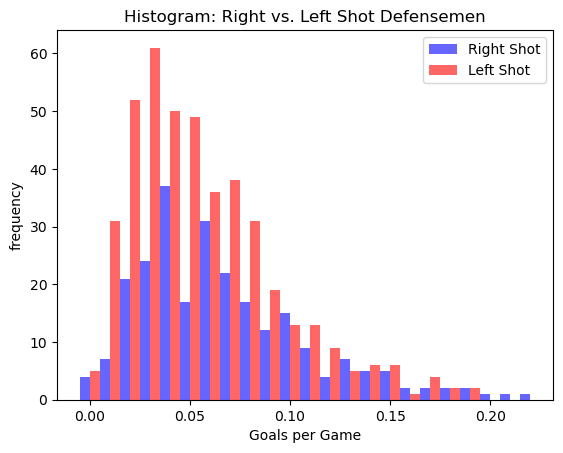

Summary Statistics:
 The median is: 0.05 
 The mean is: 0.06 
 The highest mode is: 0.04 
 The spread is: 0.0 
 The skewness is: 1.12 
 The Pearson's skewness is: 0.69 



<Figure size 800x600 with 0 Axes>

In [24]:
# goals per game
# define needed variables
data = def_stats.goalspergame
dataR = thinkstats2.Hist(round(def_stats_R.goalspergame, 2))
dataL = thinkstats2.Hist(round(def_stats_L.goalspergame, 2))
xlab = "Goals per Game"
title = "Histogram: Right vs. Left Shot Defensemen"
width = .005
# plot results with dual plot
dual_plot(dataR, dataL, xlab, title, width)
# get summary stats
stats_machine(data)

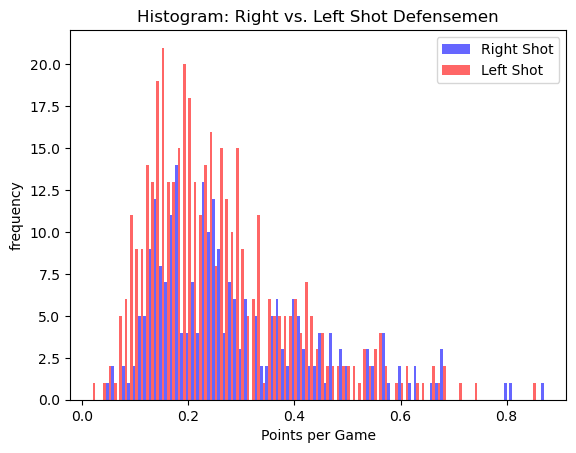

Summary Statistics:
 The median is: 0.24 
 The mean is: 0.27 
 The highest mode is: 0.14 
 The spread is: 0.02 
 The skewness is: 1.17 
 The Pearson's skewness is: 0.68 



<Figure size 800x600 with 0 Axes>

In [25]:
# points per game
# define needed variables
data = def_stats.pointpergame
dataR = thinkstats2.Hist(round(def_stats_R.pointpergame, 2))
dataL = thinkstats2.Hist(round(def_stats_L.pointpergame, 2))
xlab = "Points per Game"
title = "Histogram: Right vs. Left Shot Defensemen"
width = .005
# plot results with dual plot
dual_plot(dataR, dataL, xlab, title, width)
# get summary stats
stats_machine(data)

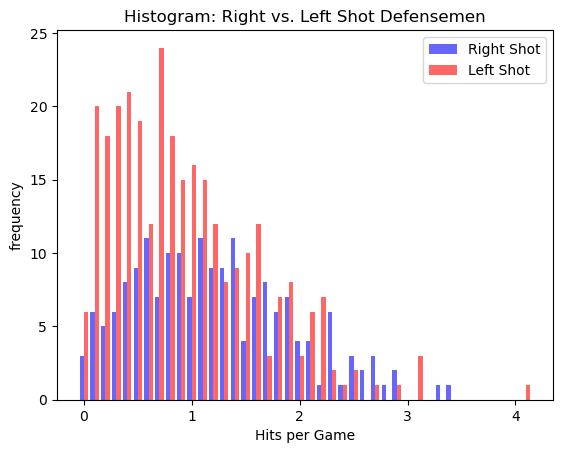

Summary Statistics:
 The median is: 0.91 
 The mean is: 1.05 
 The highest mode is: 0.13 
 The spread is: 0.51 
 The skewness is: 0.82 
 The Pearson's skewness is: 0.58 



<Figure size 800x600 with 0 Axes>

In [26]:
# hits per game
# define needed variables
def_stats_h = def_stats[def_stats['hits'] > 0]
def_stats_R_h = def_stats_R[def_stats_R['hits'] > 0]
def_stats_L_h = def_stats_L[def_stats_L['hits'] > 0]
data = def_stats_h.hitspergame
dataR = thinkstats2.Hist(round(def_stats_R_h.hitspergame, 1))
dataL = thinkstats2.Hist(round(def_stats_L_h.hitspergame, 1))
xlab = "Hits per Game"
title = "Histogram: Right vs. Left Shot Defensemen"
width = .04
# plot results with dual plot
dual_plot(dataR, dataL, xlab, title, width)
# get summary stats
stats_machine(data)

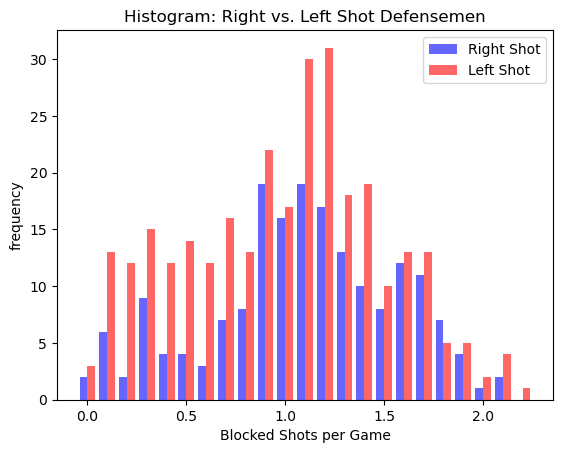

Summary Statistics:
 The median is: 1.08 
 The mean is: 1.03 
 The highest mode is: 1.25 
 The spread is: 0.25 
 The skewness is: -0.14 
 The Pearson's skewness is: -0.29 



<Figure size 800x600 with 0 Axes>

In [27]:
# blocked shots per game
# define needed variables
def_stats_bs = def_stats[def_stats['blocked_shots'] > 0]
def_stats_R_bs = def_stats_R[def_stats_R['blocked_shots'] > 0]
def_stats_L_bs = def_stats_L[def_stats_L['blocked_shots'] > 0]
data = def_stats_bs.blockedshotspergame
dataR = thinkstats2.Hist(round(def_stats_R_bs.blockedshotspergame, 1))
dataL = thinkstats2.Hist(round(def_stats_L_bs.blockedshotspergame, 1))
xlab = "Blocked Shots per Game"
title = "Histogram: Right vs. Left Shot Defensemen"
width = .04
# plot results with dual plot
dual_plot(dataR, dataL, xlab, title, width)
# get summary stats
stats_machine(data)

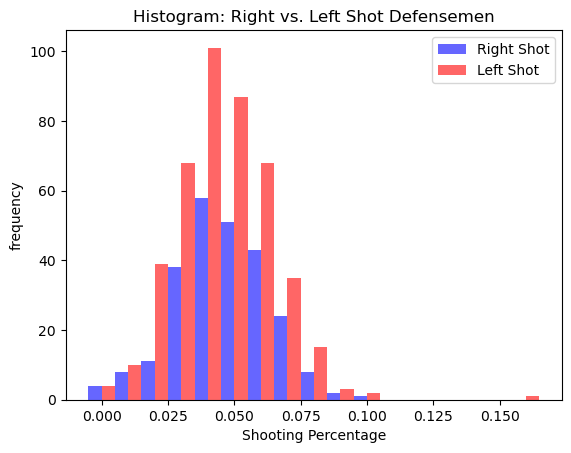

Summary Statistics:
 The median is: 0.04 
 The mean is: 0.05 
 The highest mode is: 0.04 
 The spread is: 0.0 
 The skewness is: 0.42 
 The Pearson's skewness is: 0.12 



<Figure size 800x600 with 0 Axes>

In [28]:
# Total shot percentage
# define needed variables
data = def_stats.shootprct
dataR = thinkstats2.Hist(round(def_stats_R.shootprct, 2))
dataL = thinkstats2.Hist(round(def_stats_L.shootprct, 2))
xlab = "Shooting Percentage"
title = "Histogram: Right vs. Left Shot Defensemen"
width = .005
# plot results with dual plot
dual_plot(dataR, dataL, xlab, title, width)
# get summary stats
stats_machine(data)

In [29]:
# outlier review
o_gpg = def_stats[def_stats['goalspergame'] > 0.2]
o_ppg = def_stats[def_stats['pointpergame'] > 0.7]
o_hits = def_stats[def_stats['hitspergame'] > 3]
o_sp = def_stats[def_stats['shootprct'] > 0.15]
o_sp_L = def_stats_L[def_stats_L['shootprct'] > 0.15]
display(o_gpg)
display(o_ppg)
display(o_hits)
display(o_sp)
display(o_sp_L)

,lastName,firstName,birthyear,nationality,primaryPosition,shootsCatches,weight_lbs,games_played,shots,goals,...,points,pointpergame,goalspergame,assistspergame,takeawayspergame,giveawayspergame,hitspergame,blockedshotspergame,TOIpergame,shootprct
400,Byfuglien,Dustin,1985,USA,D,R,260.0,943,2817,190,...,589,0.62,0.20,0.42,0.54,0.72,1.66,0.84,22.18,0.07
1822,Makar,Cale,1998,CAN,D,R,187.0,164,342,34,...,142,0.87,0.21,0.66,0.60,0.73,0.90,0.87,21.05,0.10
3203,Weber,Shea,1985,CAN,D,R,230.0,1180,3185,264,...,674,0.57,0.22,0.35,0.27,0.63,1.57,1.38,24.17,0.08


,lastName,firstName,birthyear,nationality,primaryPosition,shootsCatches,weight_lbs,games_played,shots,goals,...,points,pointpergame,goalspergame,assistspergame,takeawayspergame,giveawayspergame,hitspergame,blockedshotspergame,TOIpergame,shootprct
1282,Hughes,Quinn,1999,USA,D,L,170.0,184,332,22,...,156,0.85,0.12,0.73,0.57,0.99,0.11,0.72,21.53,0.07
1432,Karlsson,Erik,1990,SWE,D,R,191.0,925,2654,153,...,751,0.81,0.17,0.65,0.79,1.11,0.82,1.36,25.64,0.06
1688,Leetch,Brian,1968,USA,D,L,190.0,348,929,63,...,247,0.71,0.18,0.53,0.00,0.00,0.00,0.00,26.40,0.07
1727,Lidstrom,Nicklas,1970,SWE,D,L,192.0,887,2248,147,...,654,0.74,0.17,0.57,0.07,0.07,0.11,0.21,26.69,0.07
1801,MacInnis,Al,1963,CAN,D,R,204.0,213,757,39,...,170,0.80,0.18,0.62,0.00,0.00,0.00,0.00,26.79,0.05
1822,Makar,Cale,1998,CAN,D,R,187.0,164,342,34,...,142,0.87,0.21,0.66,0.60,0.73,0.90,0.87,21.05,0.10


,lastName,firstName,birthyear,nationality,primaryPosition,shootsCatches,weight_lbs,games_played,shots,goals,...,points,pointpergame,goalspergame,assistspergame,takeawayspergame,giveawayspergame,hitspergame,blockedshotspergame,TOIpergame,shootprct
283,Borowiecki,Mark,1989,CAN,D,L,207.0,489,431,23,...,74,0.15,0.05,0.10,0.16,0.42,4.14,1.70,15.55,0.05
781,Emelin,Alexei,1986,RUS,D,L,218.0,495,436,16,...,86,0.17,0.03,0.14,0.22,0.82,3.10,1.63,19.21,0.04
1077,Gudas,Radko,1990,CZE,D,R,204.0,644,1085,32,...,160,0.25,0.05,0.20,0.24,0.65,3.35,1.70,18.02,0.03
1098,Hagg,Robert,1995,SWE,D,L,204.0,359,366,19,...,81,0.23,0.05,0.17,0.08,0.53,3.08,1.74,16.65,0.05
1790,Lyubushkin,Ilya,1994,RUS,D,R,201.0,184,136,0,...,16,0.09,0.00,0.09,0.21,0.46,3.27,1.24,13.99,0.00
3314,Zadorov,Nikita,1995,RUS,D,L,230.0,550,622,40,...,115,0.21,0.07,0.14,0.27,0.51,3.09,1.15,17.88,0.06


,lastName,firstName,birthyear,nationality,primaryPosition,shootsCatches,weight_lbs,games_played,shots,goals,...,points,pointpergame,goalspergame,assistspergame,takeawayspergame,giveawayspergame,hitspergame,blockedshotspergame,TOIpergame,shootprct
350,Brookbank,Wade,1977,CAN,D,L,225.0,126,38,6,...,9,0.07,0.05,0.02,0.0,0.0,0.0,0.0,3.83,0.16


,lastName,firstName,birthyear,nationality,primaryPosition,shootsCatches,weight_lbs,games_played,shots,goals,...,points,pointpergame,goalspergame,assistspergame,takeawayspergame,giveawayspergame,hitspergame,blockedshotspergame,TOIpergame,shootprct
350,Brookbank,Wade,1977,CAN,D,L,225.0,126,38,6,...,9,0.07,0.05,0.02,0.0,0.0,0.0,0.0,3.83,0.16


In [30]:
# drop Wade Brookbank (350) as outlier from def_stats and def_stats_L
# 350 is not in def_stats_R
def_stats = def_stats.drop(350)
def_stats_L = def_stats_L.drop(350)
# rerun outlier
o_sp = def_stats[def_stats['shootprct'] > 0.15]
o_sp_L = def_stats_L[def_stats_L['shootprct'] > 0.15]
# check to ensure deleted
display(o_sp)
display(o_sp_L)

,lastName,firstName,birthyear,nationality,primaryPosition,shootsCatches,weight_lbs,games_played,shots,goals,...,points,pointpergame,goalspergame,assistspergame,takeawayspergame,giveawayspergame,hitspergame,blockedshotspergame,TOIpergame,shootprct


,lastName,firstName,birthyear,nationality,primaryPosition,shootsCatches,weight_lbs,games_played,shots,goals,...,points,pointpergame,goalspergame,assistspergame,takeawayspergame,giveawayspergame,hitspergame,blockedshotspergame,TOIpergame,shootprct


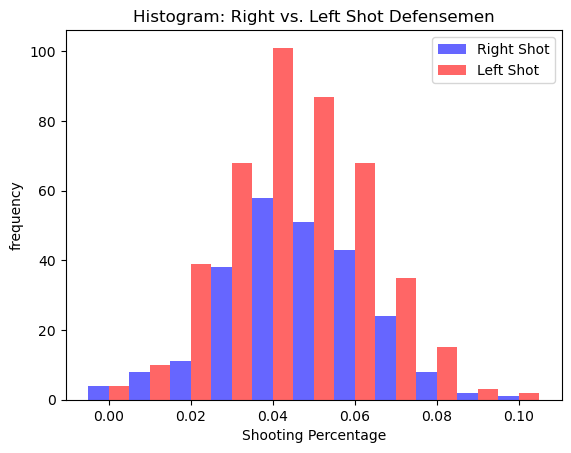

Summary Statistics:
 The median is: 0.04 
 The mean is: 0.05 
 The highest mode is: 0.04 
 The spread is: 0.0 
 The skewness is: 0.08 
 The Pearson's skewness is: 0.11 



<Figure size 800x600 with 0 Axes>

In [31]:
# Total shot percentage rerun without outlier
# define needed variables
data = def_stats.shootprct
dataR = thinkstats2.Hist(round(def_stats_R.shootprct, 2))
dataL = thinkstats2.Hist(round(def_stats_L.shootprct, 2))
xlab = "Shooting Percentage"
title = "Histogram: Right vs. Left Shot Defensemen"
width = .005
# plot results with dual plot
dual_plot(dataR, dataL, xlab, title, width)
# get summary stats
stats_machine(data)

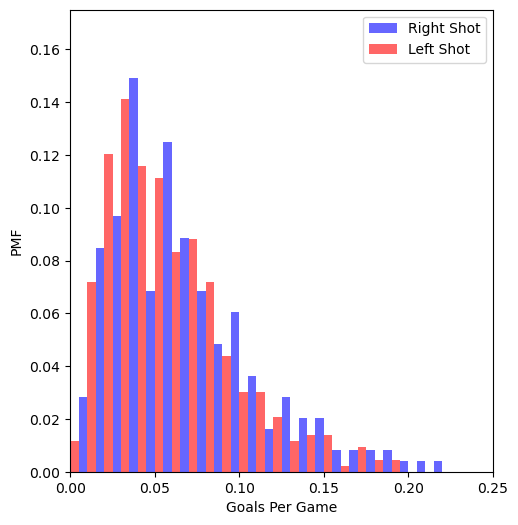

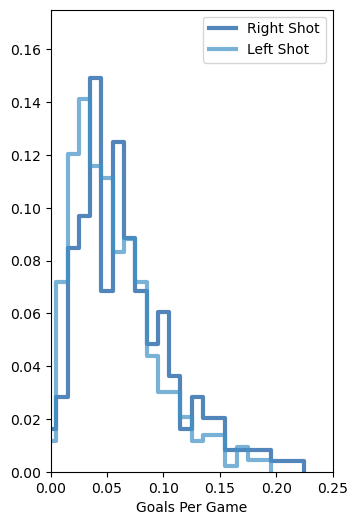

<Figure size 800x600 with 0 Axes>

In [32]:
# PMF
# Create PMF variable for comparison
RD_pmf = thinkstats2.Pmf(round(def_stats_R.goalspergame, 2), label="Right Shot")
LD_pmf = thinkstats2.Pmf(round(def_stats_L.goalspergame, 2), label="Left Shot")

# plot PMF Histogram
width = 0.005
axis = [0, .25, 0, 0.175]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(RD_pmf, align="right", width=width, color = 'blue')
thinkplot.Hist(LD_pmf, align="left", width=width, color = 'red')
thinkplot.Show(xlabel="Goals Per Game", ylabel="PMF", axis=axis)

# plot PMF line comparison
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([RD_pmf, LD_pmf])
#thinkplot.Pmf(RD_pmf, width=width, color = 'blue')
#thinkplot.Pmf(LD_pmf, width=width, color = 'red')
thinkplot.Show(xlabel="Goals Per Game", axis=axis)

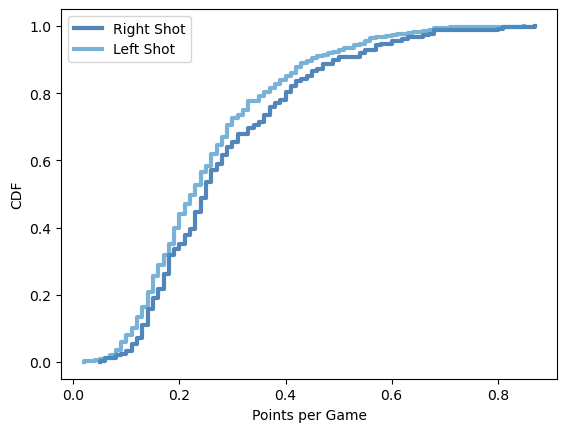

<Figure size 800x600 with 0 Axes>

In [33]:
# define variables for cdf
RD_cdf = thinkstats2.Cdf(round(def_stats_R.pointpergame, 2), label='Right Shot')
LD_cdf = thinkstats2.Cdf(round(def_stats_L.pointpergame, 2), label='Left Shot')

# plot cdfs
thinkplot.PrePlot(2)
thinkplot.Cdfs([RD_cdf, LD_cdf])
thinkplot.Show(xlabel='Points per Game', ylabel='CDF')

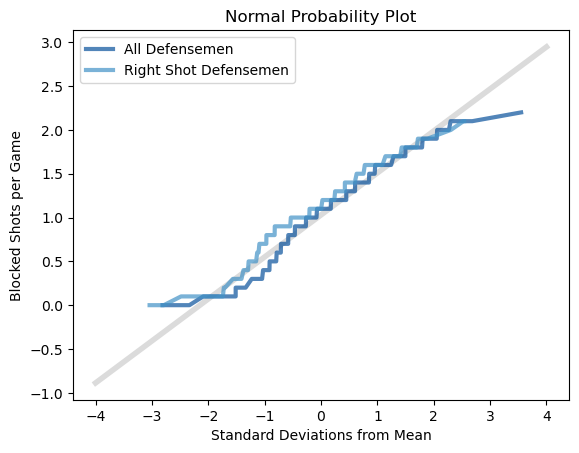

In [34]:
# Normal probability plot
def_stats_bs = def_stats[def_stats['blocked_shots'] > 0]
def_stats_R_bs = def_stats_R[def_stats_R['blocked_shots'] > 0]
data_bs = round(def_stats_bs.blockedshotspergame, 1)
dataR_bs = round(def_stats_R_bs.blockedshotspergame, 1)

mean, var = thinkstats2.TrimmedMeanVar(data_bs, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8")

thinkplot.PrePlot(2)
xs, ys = thinkstats2.NormalProbability(data_bs)
thinkplot.Plot(xs, ys, label="All Defensemen")

xs, ys = thinkstats2.NormalProbability(dataR_bs)
thinkplot.Plot(xs, ys, label="Right Shot Defensemen")
thinkplot.Config(
    title="Normal Probability Plot",
    xlabel="Standard Deviations from Mean",
    ylabel="Blocked Shots per Game",)

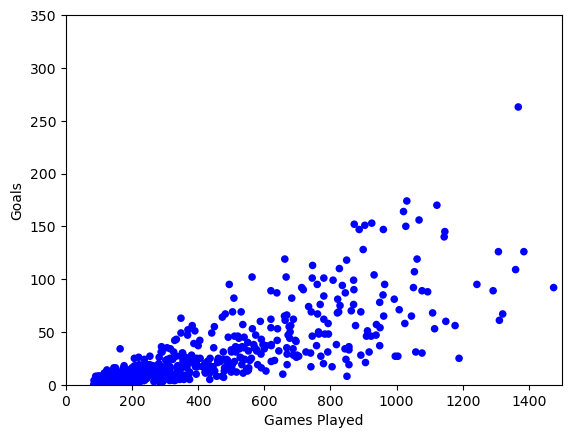

The covariance is: 8652.72 
The correlation is: 0.78 
The Spearman Correlation is: 0.84


<Figure size 800x600 with 0 Axes>

In [35]:
# create sample
sample = SampleRows(def_stats, 500)
games_played, goals = sample.games_played, sample.goals

# plot sample
thinkplot.Scatter(games_played, goals, alpha=1)
thinkplot.Show(xlabel='Games Played',
                 ylabel='Goals',
                 axis=[0, 1500, 0, 350],
                 legend=False)

# covariance and correlations
cov_goal = Cov(games_played, goals)
corr_goal = Corr(games_played, goals)
sc_goal = SpearmanCorr(games_played, goals)

# display results
print('The covariance is:', round(cov_goal, 2),
      '\nThe correlation is:', round(corr_goal, 2),
      '\nThe Spearman Correlation is:', round(sc_goal, 2))

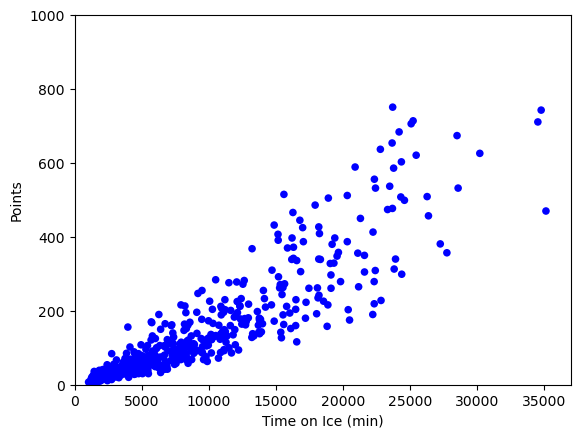

The covariance is: 927915.48 
The correlation is: 0.9 
The Spearman Correlation is: 0.94


<Figure size 800x600 with 0 Axes>

In [36]:
# create sample
sample = SampleRows(def_stats, 500)
timeonice_m, points = sample.timeonice_m, sample.points

# plot sample
thinkplot.Scatter(timeonice_m, points, alpha=1)
thinkplot.Show(xlabel='Time on Ice (min)',
                 ylabel='Points',
                 axis=[0, 37000, 0, 1000],
                 legend=False)

# covariance and correlations
cov_pts = Cov(timeonice_m, points)
corr_pts = Corr(timeonice_m, points)
sc_pts = SpearmanCorr(timeonice_m, points)

# display results
print('The covariance is:', round(cov_pts, 2),
      '\nThe correlation is:', round(corr_pts, 2),
      '\nThe Spearman Correlation is:', round(sc_pts, 2))

The p-value is: 0.0


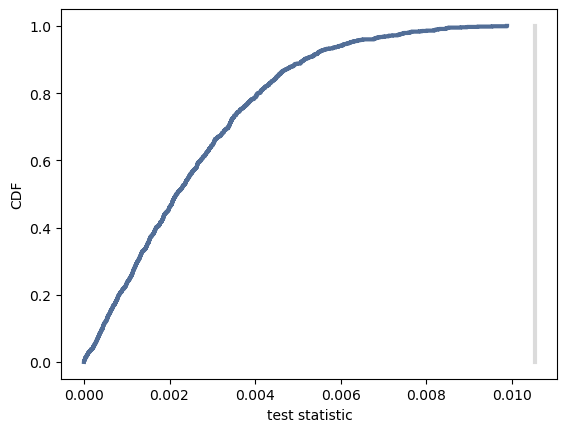

<Figure size 800x600 with 0 Axes>

In [37]:
# define data
data = def_stats_R.goalspergame.values, def_stats_L.goalspergame.values

# run hypothesis test
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
print('The p-value is:', pvalue)

ht.PlotCdf()
thinkplot.Show(xlabel='test statistic',
                   ylabel='CDF')


In [38]:
# run linear reggresiion with goals and games played
formula = 'goals ~ games_played'
model = smf.ols(formula, data=def_stats)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  goals   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     998.8
Date:                Tue, 18 Feb 2025   Prob (F-statistic):          1.95e-135
Time:                        21:04:57   Log-Likelihood:                -3106.4
No. Observations:                 680   AIC:                             6217.
Df Residuals:                     678   BIC:                             6226.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -10.9009      1.620     -6.727      0.000     -14.082      -7.719
games_played     0.0942      0.003     31.603      0.000       0.088       0.100
==============================================================================
Omnibus:                      266.566   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1967.770
Skew:                           1.567   Prob(JB):                         0.00
Kurtosis:                      10.722   Cond. No.                         983.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""